# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент гр. 9381 Колованов Родион, вариант 52.

## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения

#### Бинарный метод

Бинарный метод - это один из алгоритмов быстрого возведения числа $x$ в некоторую степень $n\in \mathbb{N}$.

Алгоритм заключается в следующем: для начала числа $x$ представляется в двоичном виде, после чего из этого двоичного представления удаляется старший бит (единица). Далее в цикле просматриваются биты от старшего к младшему: на каждой итерации $x$ умножается на себя, при этом если очередной бит числа равен 1, то к результату произведения прибавляется $x$. 

Количество операций, требуемых для возведения числа $x$ в степень $n$, для данного метода равно $\lambda(n)+\nu(n)-1$, где $\lambda(n)=\lceil log_2(n) \rceil$, а $\nu(n)$ равно количеству единиц в двоичной записи числа $n$.

#### Метод множителей

Метод множителей  это один из алгоритмов быстрого возведения числа $x$ в некоторую степень $n\in \mathbb{N}$.

Алгоритм заключается в следующем: для начала производится поиск минимального простого делителя числа $n$ ($n=i \cdot j$), где $i$ - минимальный простой делитель числа $n$). Далее при помощи бинарного метода число &x& возводится в степень $i$, после чего полученный результат $x^i=y$ возводится в степень $j$: $y^j={(x^i)}^j=x^{i\cdot j}=x^n$. Если $n$ - простое число, то алгоритм сначала возводит число $x$ в степень $n-1$, а потом домножает на $x$, получая тем самым $x^n$.

Количество операций, требуемых для возведения числа $x$ в степень $n$, для данного метода равно $\lambda(i)+\nu(i)+\lambda(j)+\nu(j)-2$ (в случае, если число не простое), иначе - $\lambda(n-1)+\nu(n-1)$

#### Аддитивные цепочки

Аддитивная цепочка для некоторого числа $n\in \mathbb{N}$ - это последовательность натуральных чисел $\{a_i\}_{i=0}^m$, начинающаяся с единицы, в которой каждый последующий элемент является суммой каких-то двух предшествующих элементов. Данная последовательность удовлетворяет следующим свойствам:
1. $a_0 = 1$;
2. $\forall i > 0: a_i = a_j + a_k$, где $j, k < i$.

Длина аддитивной цепочки $l(n)=|\{a_i\}_{i=0}^m|$, где $a_m = n$.

$a_i=a_j+a_k$ - шаг аддитивной цепочки, $i \in \{1,2 \dots m\}$, $0\leqslant k\leqslant j < i$

Типы шагов в аддитивной цепочке:
1. Шаг i называют удвоением, если $i - 1 = k = j$;
2. Шаг i называют звездным, если $j = i - 1$, $k \in \{0, \dots, i-1\}$;
3. Шаг i называют малым, если $\lambda(a_i)=\lambda(a_{i-1})$

Звездная цепочка - это аддитивная цепочка, в которая состоит только из звездных шагов.

#### Алгоритм Яо

Алгоритм Яо позволяет найти аддитивную цепочку для некоторого числа $n \in \mathbb{N}$. Для начала фиксируются переменные $n,k \geq 2$, после чего $n$ представляется в виде $\sum_{i=0} a_i \cdot 2^{ik}$, где $a_j \neq 0$. 

Далее вводится функция $d(z)=\sum_{\forall i: a_i=z} 2^{ik}$.

В начало аддитивной цепочки Яо добавляются степени двойки: $Y_k(n): 1,2,4,\dots ,2^{\lambda(n)}$, после чего вычисляются все значения $d(z)$, где $z \in \{1,2,3, \dots ,2^k-1 \}$ и $d(z) \neq 0$.

В таком случае число $n=\sum_{z=1}^{2^k-1}z \cdot d(z)$.

#### Алгоритм дробления вектора индексов 

Алгоритм дробления вектора индексов позволяет найти минимальную звездную цепочку для некоторого числа $n \in \mathbb{N}$. 

Рассмотрим вектор индексов $\{r_i\}_{i=1}^q \cup {\{{\rho}_j \}}_{j=q+1}^m$, где ${\rho}_j= \{x: 1 \leq x \leq j \}$, ${\{r_i\}}_{i=1}^q$ - фиксированная часть, ${\{{\rho}_j\}}_{j=q+1}^m$ - изменяющаяся часть.

Наибольшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1,q+2,\dots,m\}$.

Наименьшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q}\cup\{1,1,\dots,1\}$.

$a_{max} = a_{q+1} \cdot {2}^{m-q}$

$a_{min} = a_{q+1}+m-q$

Алгоритм:
1. Во внешнем цикле рассматриваем аддитивные цепочки длины $m$ от значения $\bar{l}(n)=\lceil log_2(n) \rceil$ до $\underline{l}(n)=\lambda(n)+\nu(n)-1$, на каждой итерации выбираем $q$ ($1 \leq q \leq m-1$);
2. Далее перебираем все возможные фиксированные части вектора индексов $\{r_i\}_{i=1}^q$ ($q!$ вариантов), для каждой строим соответствующую ей звездную цепочку, находим $a_{max}$ и ${a}_{min}$, после чего:
 1. Если $n \notin [a_{min},a_{max}]$, то переходим к следующему набору $\{r_i\}_{i=1}^q$;
 2. Если $n\in [a_{min},a_{max}]$, то перебираем все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ и находим $a_m$:
  1. Если $a_m=n$, то цепочка найдена;
  2. Если все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ исчерпаны, то переходим к следующему набору $\{r_i\}_{i=1}^q$;
3. Если все наборы вектора индексов длины $m$ исчерпаны, то увеличиваем $m$ на 1.

#### Теорема Брауэра

Для некоторого $k<log_2(log_2(n))$ верно: $l(n)<(1+k^{-1}) \cdot \lceil log_2(n) \rceil +2^{k-1}-k+2$

При $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$ верны следующие следствия:
1. $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)}=1$
2. Наилучшая верхняя оценка для длины аддитивной цепочки: $\lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2})$

#### Гипотеза Шольца-Брауэра
Пусть $l^*(n)$ - длина некоторой звёздной цепочки.

Тогда для любого $n \in \mathbb{N}$ верно: $l^*(2^n-1)\leq l^*(n)+n-1$

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где $n⩾30$, для 2-3 значений $n$ (значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1<n⩽10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы



### Бинарный метод и Метод множителей
Для начала реализуем вспомогательные функции $ \lambda(n) $ и $ \nu(n) $:

In [6]:
import math
import time

def lambd(n):
    return len(bin(n)[2:]) - 1

def nu(n):
    return sum(map(int, bin(n)[2:]))


Реализуем бинарный метод возведения числа $x$ в $n$-ую степень:

In [5]:
def binary_method_operations(n):
    return lambd(n) + nu(n) - 1

def binary_method(x, n):
    if n == 0:
        return (1, 0)
    elif n == 1:
        return (x, 0)
    
    operations = 0
    result = x
    binary = bin(n)[3:]
    
    for digit in binary:
        result *= result
        operations += 1
        if digit == '1':
            result *= x
            operations += 1
    
    return (result, operations)

Реализуем метод множителей возведения числа $x$ в $n$-ую степень:

In [6]:
def find_smallest_prime_factor(n):
    for i in range(2, n):
        if n % i == 0:
            return i
    return n
        

def multiplier_method(x, n):
    if n == 0:
        return (1, 0)
    elif n == 1:
        return (x, 0)
    
    n1 = find_smallest_prime_factor(n)
    
    if n1 == n:
        result = multiplier_method(x, n - 1)
        return (result[0] * x, result[1] + 1)
    
    n2 = n // n1
    
    result1, operations1 = binary_method(x, n1)
    result2, operations2 = binary_method(result1, n2)
    
    return (result2, operations1 + operations2)

Применим бинарный метод и метод множителей для значений $x=1$ и $n=31,32,33,63,64,65$:

In [7]:
print("Бинарный метод: 2^31 = {}; количество операций: {}".format(*binary_method(1, 31)))
print("Бинарный метод: 2^32 = {}; количество операций: {}".format(*binary_method(1, 32)))
print("Бинарный метод: 2^33 = {}; количество операций: {}".format(*binary_method(1, 33)))
print("Бинарный метод: 2^63 = {}; количество операций: {}".format(*binary_method(1, 63)))
print("Бинарный метод: 2^64 = {}; количество операций: {}".format(*binary_method(1, 64)))
print("Бинарный метод: 2^65 = {}; количество операций: {}".format(*binary_method(1, 65)))
print("Бинарный метод: 2^127 = {}; количество операций: {}".format(*binary_method(1, 127)))
print("Бинарный метод: 2^128 = {}; количество операций: {}".format(*binary_method(1, 128)))
print("Бинарный метод: 2^129 = {}; количество операций: {}".format(*binary_method(1, 129)))

print("Метод множителей: 2^31 = {}; количество операций: {}".format(*multiplier_method(1, 31)))
print("Метод множителей: 2^32 = {}; количество операций: {}".format(*multiplier_method(1, 32)))
print("Метод множителей: 2^33 = {}; количество операций: {}".format(*multiplier_method(1, 33)))
print("Метод множителей: 2^63 = {}; количество операций: {}".format(*multiplier_method(1, 63)))
print("Метод множителей: 2^64 = {}; количество операций: {}".format(*multiplier_method(1, 64)))
print("Метод множителей: 2^65 = {}; количество операций: {}".format(*multiplier_method(1, 65)))
print("Метод множителей: 2^127 = {}; количество операций: {}".format(*multiplier_method(1, 127)))
print("Метод множителей: 2^128 = {}; количество операций: {}".format(*multiplier_method(1, 128)))
print("Метод множителей: 2^129 = {}; количество операций: {}".format(*multiplier_method(1, 129)))

Бинарный метод: 2^31 = 1; количество операций: 8
Бинарный метод: 2^32 = 1; количество операций: 5
Бинарный метод: 2^33 = 1; количество операций: 6
Бинарный метод: 2^63 = 1; количество операций: 10
Бинарный метод: 2^64 = 1; количество операций: 6
Бинарный метод: 2^65 = 1; количество операций: 7
Бинарный метод: 2^127 = 1; количество операций: 12
Бинарный метод: 2^128 = 1; количество операций: 7
Бинарный метод: 2^129 = 1; количество операций: 8
Метод множителей: 2^31 = 1; количество операций: 8
Метод множителей: 2^32 = 1; количество операций: 5
Метод множителей: 2^33 = 1; количество операций: 7
Метод множителей: 2^63 = 1; количество операций: 8
Метод множителей: 2^64 = 1; количество операций: 6
Метод множителей: 2^65 = 1; количество операций: 8
Метод множителей: 2^127 = 1; количество операций: 12
Метод множителей: 2^128 = 1; количество операций: 7
Метод множителей: 2^129 = 1; количество операций: 10


| n | Бинарный метод | Метод множителей |
|:-:|:--------------:|:----------------:|
| 31  | 8  | 8  |
| 32  | 5  | 5  |
| 33  | 6  | 7  |
| 63  | 10 | 8  |
| 64  | 6  | 6  |
| 65  | 7  | 8  |
| 127 | 12 | 12 |
| 128 | 7  | 7  |
| 129 | 8  | 10 |

Сравним количество операций бинарного метода и метода множителей при $0 \leq n \leq 1000$:

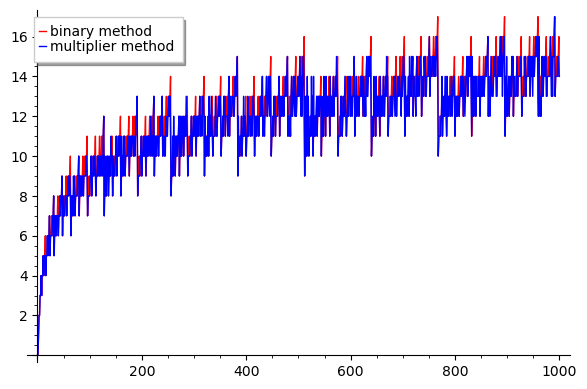

In [8]:
n_array = [x for x in range(1001)]
b_values = [(n, binary_method(1, n)[1]) for n in n_array]
m_values = [(n, multiplier_method(1, n)[1]) for n in n_array]

l1 = line(b_values, rgbcolor=Color(1, 0, 0), legend_label='binary method')
l2 = line(m_values, rgbcolor=Color(0, 0, 1), legend_label='multiplier method')

l1 + l2

Значения $n$ ($0 \leq n \leq 1000$), при которых бинарный метод делает меньше операций, чем метод множителей:

In [9]:
for i in range(len(n_array)):
    if b_values[i] < m_values[i]:
        print(n_array[i], end=' ')

33 49 65 69 81 129 133 141 145 161 165 177 209 217 225 259 261 265 273 275 285 305 321 329 333 341 357 369 385 395 403 417 453 465 513 515 517 519 525 529 537 545 549 553 561 573 581 589 595 609 611 625 645 649 657 669 705 713 717 721 741 753 775 781 785 793 801 817 833 835 837 841 849 865 869 889 897 899 905 909 913 933 945 961 

Сравнивая количество операций для каждого метода, можно заметить, что при некоторых значениях $n$ более оптимальным является метод множителей, при других значениях $n$ более оптимальным может являться бинарный метод. Судя по графику, в общем случае наиболее оптимальным является метод множителей. Было замечено, что при $n=2^k+1$, где $k\in \mathbb{N}$, бинарный метод делает не больше операций, чем метод множителей.

In [10]:
x, n = map(int, input("Введите x и n: ").split())

print("Бинарный метод: {}^{} = {}; количество операций: {}".format(x, n, *binary_method(x, n)))
print("Метод множителей: {}^{} = {}; количество операций: {}".format(x, n, *multiplier_method(x, n)))

Введите x и n: 1 849
Бинарный метод: 1^849 = 1; количество операций: 13
Метод множителей: 1^849 = 1; количество операций: 14


### Алгоритм Яо
Реализуем алгоритм Яо для вычисления приближённых аддитивных цепочек:

In [74]:
def binary_method_yao(dz, n):
    result = [dz]
    summ = dz
    binary = bin(n)[3:]

    for digit in binary:
        summ += summ
        result.append(summ)
        if digit == '1':
            summ += dz
            result.append(summ)

    return result

def d(Y, A, z):
    result = 0
    
    for i in range(len(A)):
        if A[i] == z:
            result += 2 ** (i * k)
        
            if result not in Y:
                Y.append(result)
    
    return result
    
def yao_method(n, k):
    Y = [2 ** i for i in range(lambd(n) + 1)]
    A = []
    zdz_summ = 0
    two_power_k = 2 ** k
    
    x = n
    while x != 0:
        A.append(x % two_power_k)
        x = x // two_power_k
    
    for z in range(1, 2 ** k):
        dz = d(Y, A, z)
        
        if dz != 0:
            chain = binary_method_yao(dz, z)
            
            for e in chain:
                if e not in Y:
                    Y.append(e)
            
            zdz_summ += chain[-1]
            
            if zdz_summ not in Y:
                Y.append(zdz_summ)
    
    return Y
    

Применим алгоритм Яо для вычисления приближённых аддитивных цепочек для различных чисел $n$ при варьировании параметра $k$ и сопоставим длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа:

In [75]:
min_chain_size_numbers = [1, 2, 4, 5, 12, 17, 33, 72, 136, 384, 768, 587, 1536, 3072]
min_chain_size = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 13]

for i in range(len(min_chain_size_numbers)):
    for k in range(2, 6):
        n = min_chain_size_numbers[i]
        result = yao_method(n, k)
        print("Алгоритм Яо при k = {} и n = {}:".format(k, n))
        print("\tДлина цепочки: {}; длина минимальной цепочки: {}\n\tЦепочка: {}.\n".format(len(result), min_chain_size[i], result))


Алгоритм Яо при k = 2 и n = 1:
	Длина цепочки: 1; длина минимальной цепочки: 1
	Цепочка: [1].

Алгоритм Яо при k = 3 и n = 1:
	Длина цепочки: 1; длина минимальной цепочки: 1
	Цепочка: [1].

Алгоритм Яо при k = 4 и n = 1:
	Длина цепочки: 1; длина минимальной цепочки: 1
	Цепочка: [1].

Алгоритм Яо при k = 5 и n = 1:
	Длина цепочки: 1; длина минимальной цепочки: 1
	Цепочка: [1].

Алгоритм Яо при k = 2 и n = 2:
	Длина цепочки: 2; длина минимальной цепочки: 2
	Цепочка: [1, 2].

Алгоритм Яо при k = 3 и n = 2:
	Длина цепочки: 2; длина минимальной цепочки: 2
	Цепочка: [1, 2].

Алгоритм Яо при k = 4 и n = 2:
	Длина цепочки: 2; длина минимальной цепочки: 2
	Цепочка: [1, 2].

Алгоритм Яо при k = 5 и n = 2:
	Длина цепочки: 2; длина минимальной цепочки: 2
	Цепочка: [1, 2].

Алгоритм Яо при k = 2 и n = 4:
	Длина цепочки: 3; длина минимальной цепочки: 3
	Цепочка: [1, 2, 4].

Алгоритм Яо при k = 3 и n = 4:
	Длина цепочки: 3; длина минимальной цепочки: 3
	Цепочка: [1, 2, 4].

Алгоритм Яо при k = 4 и n 

| k | n | Цепочка Яо | Длина цепочки Яо | Длина минимальной цепочки |
|:-:|:-:|:----------:|:----------------:|:-------------------------:|
| 2 | 1 | [1] | 1 | 1 | 
| 3 | 1 | [1] | 1 | 1 | 
| 4 | 1 | [1] | 1 | 1 | 
| 5 | 1 | [1] | 1 | 1 | 
| 2 | 2 | [1, 2] | 2 | 2 |
| 3 | 2 | [1, 2] | 2 | 2 |
| 4 | 2 | [1, 2] | 2 | 2 | 
| 5 | 2 | [1, 2] | 2 | 2 | 
| 2 | 4 | [1, 2, 4] | 3 | 3 |
| 3 | 4 | [1, 2, 4] | 3 | 3 |
| 4 | 4 | [1, 2, 4] | 3 | 3 |
| 5 | 4 | [1, 2, 4] | 3 | 3 |
| 2 | 5 | [1, 2, 4, 5] | 4 | 4 |
| 3 | 5 | [1, 2, 4, 5] | 4 | 4 |
| 4 | 5 | [1, 2, 4, 5] | 4 | 4 |
| 5 | 5 | [1, 2, 4, 5] | 4 | 4 |
| 2 | 12 | [1, 2, 4, 8, 12] | 5 | 5 |
| 3 | 12 | [1, 2, 4, 8, 12] | 5 | 5 |
| 4 | 12 | [1, 2, 4, 8, 3, 6, 12] | 7 | 5 |
| 5 | 12 | [1, 2, 4, 8, 3, 6, 12] | 7 | 5 |
| 2 | 17 | [1, 2, 4, 8, 16, 17] | 6 | 6
| 3 | 17 | [1, 2, 4, 8, 16, 17] | 6 | 6
| 4 | 17 | [1, 2, 4, 8, 16, 17] | 6 | 6
| 5 | 17 | [1, 2, 4, 8, 16, 17] | 6 | 6
| 2 | 33 | [1, 2, 4, 8, 16, 32, 33] | 7 | 7
| 3 | 33 | [1, 2, 4, 8, 16, 32, 33] | 7 | 7
| 4 | 33 | [1, 2, 4, 8, 16, 32, 33] | 7 | 7
| 5 | 33 | [1, 2, 4, 8, 16, 32, 33] | 7 | 7
| 2 | 72 | [1, 2, 4, 8, 16, 32, 64, 72] | 8 | 8
| 3 | 72 | [1, 2, 4, 8, 16, 32, 64, 72] | 8 | 8
| 4 | 72 | [1, 2, 4, 8, 16, 32, 64, 72] | 8 | 8
| 5 | 72 | [1, 2, 4, 8, 16, 32, 64, 72] | 8 | 8
| 2 | 136 | [1, 2, 4, 8, 16, 32, 64, 128, 68, 136] | 10 | 9
| 3 | 136 | [1, 2, 4, 8, 16, 32, 64, 128, 136] | 9 | 9
| 4 | 136 | [1, 2, 4, 8, 16, 32, 64, 128, 17, 34, 68, 136] | 12 | 9
| 5 | 136 | [1, 2, 4, 8, 16, 32, 64, 128, 136] | 9 | 9
| 2 | 384 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 384] | 10 | 10
| 3 | 384 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 192, 384] | 11 | 10
| 4 | 384 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 384] | 10 | 10
| 5 | 384 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 96, 192, 384] | 12 | 10
| 2 | 768 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 768] | 11 | 11
| 3 | 768 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 768] | 11 | 11
| 4 | 768 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 768] | 11 | 11
| 5 | 768 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 96, 192, 384, 768] | 14 | 11
| 2 | 587 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 260, 520, 584, 3, 587] | 15 | 12
| 3 | 587 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 72, 584, 3, 587] | 14 | 12
| 4 | 587 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 576, 5, 10, 11, 587] | 15 | 12
| 5 | 587 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 5, 10, 11, 288, 576, 587] | 16 | 12
| 2 | 1536 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1536] | 12 | 12
| 3 | 1536 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1536] | 12 | 12
| 4 | 1536 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 768, 1536] | 13 | 12
| 5 | 1536 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1536] | 12 | 12
| 2 | 3072 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 3072] | 13 | 13
| 3 | 3072 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 1536, 3072] | 14 | 13
| 4 | 3072 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 768, 1536, 3072] | 15 | 13
| 5 | 3072 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 3072] | 13 | 13


Сравним длины цепочек, полученных при помощи алгоритма Яо, при различных $k$ ($2 \leq k \leq 6$) для $500 \leq n \leq 800$:

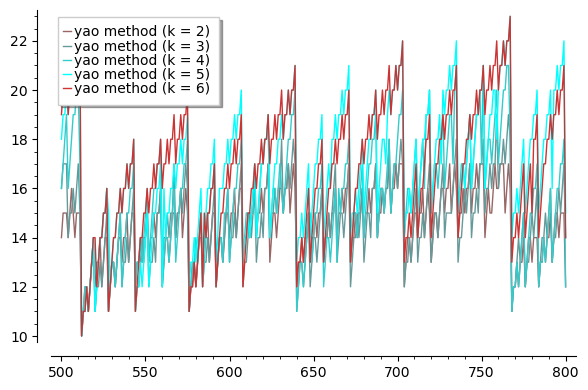

In [76]:
lines = []
k_array = [2, 3, 4, 5, 6]
k_len = len(k_array)
n_array = [x for x in range(500, 801)]

for k in k_array:
    y_values = [(n, len(yao_method(n, k))) for n in n_array]
    lines.append(line(y_values, rgbcolor=Color((k_len - k) / k_len, k / k_len, k / k_len), legend_label='yao method (k = {})'.format(k)))

sum(lines)

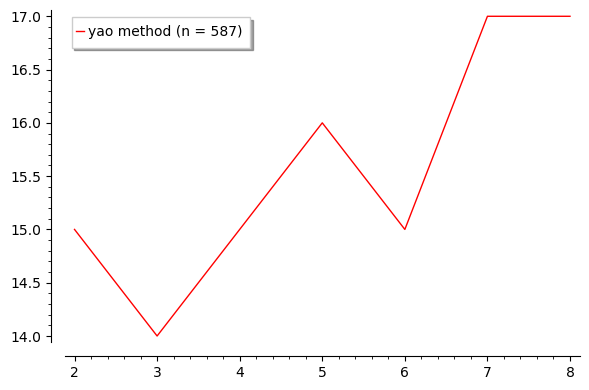

In [77]:
n = 587

k_array = [x for x in range(2, int(math.log2(n)))]
y_values = []

for k in k_array:
    y_values.append((k, len(yao_method(n, k))))

line(y_values, rgbcolor=Color(1, 0, 0), legend_label='yao method (n = {})'.format(n))

Сравнивая длины цепочек, полученные алгоритмом Яо, с длининами минимальных цепочек можно заметить, что алгоритм Яо выдает минимальные цепочки для заданных $n$ при определенном $k$. Для некоторых $n$ алгоритм не дает минимальную цепочку, например, для $n=587$. По графику видно, что для различных $n$ минимальная цепочка (минимальная цепочка выбирается среди цепочек, полученных алгоритмом Яо при $2 \leq k \leq 6$) получается при различных $k$.

In [78]:
n, k = map(int, input("Введите n и k: ").split())
result = yao_method(n, k)

print("Цепочка:", result)
print("Длина цепочки:", len(result))

Введите n и k: 12 2
Цепочка: [1, 2, 4, 8, 12]
Длина цепочки: 5


### Алгоритм дробления вектора индексов
Реализуем алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа:

In [16]:
# Класс вектора индексов
class IndexVector:
    def __init__(self, end, start=1):
        self.start = start
        self.end = end
        self.size = end - start + 1
        self.vector = [start + i for i in range(self.size)]
        
    def generate_next_vector(self):
        for i in range(self.size):
            if self.vector[self.size - i - 1] < self.start + self.size - i - 1:
                self.vector[self.size - i - 1] += 1
                return True
            else:
                self.vector[self.size - i - 1] = 1
        
        return False
    
    def generate_prev_vector(self):
        for i in range(self.size):
            if self.vector[self.size - i - 1] > 1:
                self.vector[self.size - i - 1] -= 1
                return True
            else:
                self.vector[self.size - i - 1] = self.start + self.size - i - 1
        
        return False
    
    def get_star_chain(self):
        chain = [1]
        
        for i in range(self.size):
            chain.append(chain[i] + chain[self.vector[i] - 1])
        
        return chain

def get_star_chain(ri, pi):
    chain = [1]

    for i in range(ri.size):
        chain.append(chain[i] + chain[ri.vector[i] - 1])
        
    for i in range(pi.size):
        chain.append(chain[ri.size + i] + chain[pi.vector[i] - 1])

    return chain


In [17]:
def index_vector_splitting_method(n, direction_prev = True):
    l_min = math.ceil(math.log2(n))
    l_max = lambd(n) + nu(n) - 1
    
    for m in range(l_min, l_max + 1):
        q = m // 2
        ri = IndexVector(q)
        
        for _ in range(factorial(q)):
            ri_chain = ri.get_star_chain()
            
            a_q = ri_chain[len(ri_chain) - 1]
            a_min = a_q + m - q
            a_max = a_q * (2 ** (m - q))
            
            if a_min > n or n > a_max:
                if direction_prev:
                    ri.generate_prev_vector()
                else:
                    ri.generate_next_vector()
                continue
            elif a_min <= n and n <= a_max:
                pi = IndexVector(m, start = q + 1)
                
                for _ in range(factorial(m) // factorial(q)):
                    ri_pi_chain = get_star_chain(ri, pi)
                    a_m = ri_pi_chain[len(ri_pi_chain) - 1]
                    
                    if a_m == n:
                        return ri_pi_chain
                    
                    if direction_prev:
                        pi.generate_prev_vector()
                    else:
                        pi.generate_next_vector()
            
            if direction_prev:
                ri.generate_prev_vector()
            else:
                ri.generate_next_vector()
                

Протестируеи алгоритм при $n>500$ и сравним с предыдущими методами:

In [ ]:
chain_size_numbers = [511, 512, 513, 638, 719]

for i in range(len(chain_size_numbers)):
    n = chain_size_numbers[i]
    yao_chain = yao_method(2, n)
    
    start_time = time.time()
    ivs_chain = index_vector_splitting_method(n)
    end_time = time.time()
    
    print("При n = {}:".format(n))
    print("\tВремя работы алгоритма дробления вектора индексов: {} sec.".format(round(end_time - start_time, 3)))
    print("\tЦепочка, полученная алгоритмом дробления вектора индексов:", ivs_chain)
    print("\tДлина цепочки, полученная алгоритмом дробления вектора индексов:", len(ivs_chain))
    print("\tДлина цепочки, полученная алгоритмом Яо (k=2):", len(yao_chain), end='\n\n')


Сравним алгоритм дробления вектора индексов с алгоритмом Яо:

| n | Цепочка алгоритма Яо (k=2) | Цепочка алгоритма ДВИ | Длина цепочки алгоритма Яо (k=2) | Длина цепочки алгоритма ДВИ | Время работы алгоритма ДВИ |
|:-:|:--------------------:|:--------------------:|:--------------------------:|:--------------------------:|:-:|
|511| [1, 2, 4, 8, 16, 32, 64, 128, 256, 5, 21, 85, 170, 255, 511] | [1, 2, 4, 8, 16, 32, 64, 72, 73, 146, 292, 438, 511] | 15 | 13 | 485.905 sec. |
|512| [1, 2, 4, 8, 16, 32, 64, 128, 256, 512] | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512] | 10 | 10 | 0.0 sec. |
|513| [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 513] | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 513] | 11 | 11 | 0.0 sec. |
|638| [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 257, 514, 578, 20, 40, 60, 638] | [1, 2, 4, 8, 16, 32, 48, 50, 98, 196, 392, 588, 638] | 17 | 13 | 398.492 sec. |
|719| [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 5, 69, 138, 207, 719] | [1, 2, 4, 8, 16, 32, 64, 128, 192, 196, 197, 394, 591, 719] | 15 | 14 | 5877.574 sec. |

Сравним алгоритм ДВИ со всеми предыдущими алгоритмами по длине цепочки:

| n | Алгоритм ДВИ | Алгоритм Яо | Бинарный метод | Метом множителей |
|:-:|:------------:|:-----------:|:--------------:|:----------------:|
|511| 13 | 15 | 17 | 13 |
|512| 10 | 10 | 10 | 10 |
|513| 11 | 11 | 11 | 14 |
|638| 13 | 17 | 16 | 16 |
|719| 14 | 15 | 16 | 16 |

Нахождение минимальной аддитивной цепочки во многих случаях требует несколько десятков минут при $n > 500$. Из предыдущих алгоритмов лучше всего показал себя алгоритм дробления вектора индексов, а хуже всего - бинарный метод. Однако стоит учитывать, что алгоритм ДВИ работает очень медленно. Сравнивая алгоритм Яо, бинарный метод и метод множителей, можно заметить, что для различных $n$ каждый из них может быть не хуже двух других.

In [19]:
n = int(input("Введите n: "))

start_time = time.time()
ivs_chain = index_vector_splitting_method(n)
end_time = time.time()

print("Время работы алгоритма: {} sec.".format(round(end_time - start_time, 3)))
print("Цепочка:", ivs_chain)
print("Длина цепочки:", len(ivs_chain))

Введите n: 1024
Время работы алгоритма: 0.0 sec.
Цепочка: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
Длина цепочки: 11


### Проверка 1-ого следствия теоремы Брауэра


Проверим первое следствие теоремы Брауэра:

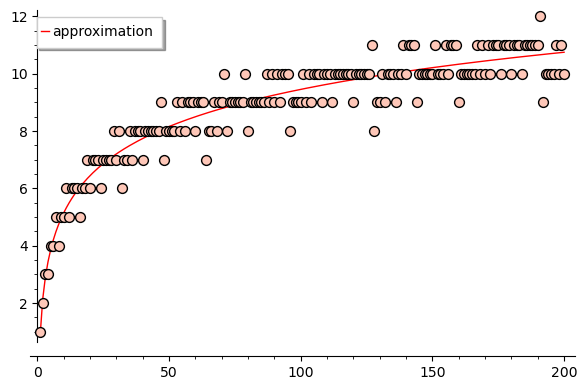

In [8]:
def get_chains_minimal_length(n):
    n_values = [n for n in range(1, n + 1)]
    l_values = {1: 0}
    l_values_list = []
    
    for n in range(2, n + 1):
        q = factor(n)[0][0]
        sigma = 0
        
        if n in [23, 43, 59, 77, 83, 107, 149, 163, 165, 179, 203]:
            sigma = 1
            
        if q == n:
            l_values[n] = l_values[n - 1] + 1 - sigma
        else:
            l_values[n] = min(l_values[n - 1] + 1, l_values[q] + l_values[n // q]) - sigma
    
    for n in n_values:
        l_values_list.append(l_values[n] + 1)
    
    return n_values, l_values_list

def approximate_values(n_values, l_values):
    M = matrix([
        [sum([float(log(x) ** 2) for x in n_values]), sum([float(log(x)) for x in n_values])], 
        [sum([float(log(x)) for x in n_values]), len(n_values)]
    ])
    V = vector([sum([float(l_values[i] * log(n_values[i])) for i in range(len(n_values))]), sum(l_values)])
    result = M.solve_right(V)
    approximate_values = [(x, result[0] * log(x) + result[1]) for x in n_values]
    
    return line(approximate_values, rgbcolor=Color(1, 0, 0), legend_label='approximation')

n_values, l_values = get_chains_minimal_length(200)
values = list(zip(n_values, l_values))

line1 = scatter_plot(values)
line2 = approximate_values(n_values, l_values)
line1 + line2

По графику видно, что множество значений минимальных длин аддитивных цепочек $l(n)$ при $1 \leq n \leq 200$ аппроксимируется логарифмической кривой. Это подтверждает первое следствие теоремы Брауэра: $\lim\limits_{n\to\infty} \cfrac{l(n)}{\lambda(n)}=1$, которое означает, что с увеличением $n$ длина минимальной аддитивной цепочки будет увеличиваться как логарифмическая функция.

### Проверка гипотезы Шольца–Брауэра

Проверим гипотезу Шольца–Брауэра для $1<n⩽10$ на алгоритме дробления вектора индексов:

In [ ]:
for n in range(2, 11):
    a = index_vector_splitting_method(2 ** n - 1)
    b = index_vector_splitting_method(n)
    
    if len(a) <= len(b) + n - 1:
        print("Проверим гипотезу Шольца–Брауэра для n = {}: Верна для заданного n. (l(2^n-1) = {}, l(n) + n - 1 = {})".format(n, len(a), len(b) + n - 1))
    else:
        print("Проверим гипотезу Шольца–Брауэра для n = {}: Неверна для заданного n. (l(2^n-1) = {}, l(n) + n - 1 = {})".format(n, len(a), len(b) + n - 1))


| $n$ | $l^*(2^n-1)$ | $l^*(n)+n-1$ |
|:---:|:------------:|:----------:|
|2 |3|3|
|3 |5|5|
|4 |6|6|
|5 |8|8|
|6 |9|9|
|7 |11|11|
|8 |11|11|
|9 |13|13|
|10|14|14|

Из результатов понятно, что гипотеза Шольца-Брауэра справедлива при $2 \leq n \leq 10$. Благодаря этой гипотезе можно найти минимальную длину цепочки для числа $2^n-1$, посчитав минимальную длину цепочки для числа n.

### Модификация алгоритма Яо

Можно заметить, что в алгоритме Яо для разложения числа $n=\sum_{i=0} a_i \cdot 2^{ik}$ используется только степени $2^{ik}$. Поэтому в качестве первых элементов для аддитивной цепочки Яо можно вычислять степени двойки не до $2^{\lambda(n)}$ включительно, а только до наибольшего множителя $2^{ik}$ в разложении числа $n$.

In [80]:
def modified_yao_method(n, k):
    A = []
    zdz_summ = 0
    two_power_k = 2 ** k
    index = 0
    
    x = n
    while x != 0:
        A.append(x % two_power_k)
        x = x // two_power_k
        index += 1
        
    Y = [2 ** i for i in range((index - 1) * k + 1)]
    
    for z in range(1, 2 ** k):
        dz = d(Y, A, z)
        
        if dz != 0:
            chain = binary_method_yao(dz, z)
            
            for e in chain:
                if e not in Y:
                    Y.append(e)
            
            zdz_summ += chain[-1]
            
            if zdz_summ not in Y:
                Y.append(zdz_summ)
    
    return Y

Сравним исходный и модифицированный алгоритм Яо:

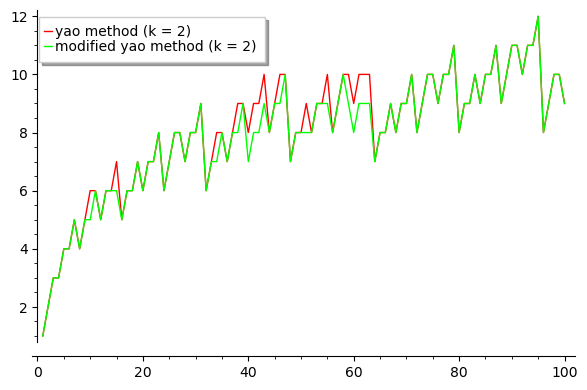

In [88]:
n_array = [n for n in range(1, 101)]
y_values = [(n, len(yao_method(n, 2))) for n in n_array]
m_y_values = [(n, len(modified_yao_method(n, 2))) for n in n_array]

line1 = line(y_values, rgbcolor=Color(1, 0, 0), legend_label='yao method (k = 2)')
line2 = line(m_y_values, rgbcolor=Color(0, 1, 0), legend_label='modified yao method (k = 2)')

line1 + line2

По графику видно, что модифицированный алгоритм Яо для некоторых значений $n$ находит аддитивную цепочку меньшей длины, чем исходный алгоритм Яо. При этом модифицированный алгоритм Яо всегда дает аддитивную цепочку длины, не превышающей длину аддитивной цепочки, полученной исходным алгоритмом Яо.

## Выводы
В ходе выполнения практической работы были сформированы представления о аддитивных цепочках, выработано умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, получен навык использования системы компьютерной алгебры SageMath для реализации алгоритмов.

Были реализованы и исследованы следующие алгоритмы формирования аддитивных цепочек:
* Бинарный метод;
* Метод множителей;
* Алгоритм Яо и модифицированный алгоритм Яо;
* Алгоритм дробления вектора индексов.

Помимо этого были проверены первое следствие теоремы Брауэра и гипотеза Шольца–Брауэра для $1 < n \leq 10$.